# Вариант 22.

In [1]:
import sympy
import numpy as np
import control as ct
import control.matlab as ctm
import matplotlib.pyplot as plt

from IPython.display import display
from sympy import I

dt = 0.001

## Задание 1

моды:
1. две устойчивые апериодические моды
3. нейтральные и устойчивые апериодические моды
7. пара устойчивых колебательных мод

In [49]:
a0 = sympy.symbols('a_0')
a1 = sympy.symbols('a_1')
lambdas = [
    [-1, -2],
    [0, -1],
    [-0.5 + 0.5*I, -0.5 - 0.5 *I]
]

In [50]:
coeffs = []
for l in lambdas:
    sol = sympy.solve([l[0] + l[1] + a1, l[0]*l[1] -a0], a0, a1)
    coeffs.append([float(sol[a0]), float(sol[a1])])
coeffs

[[2.0, 3.0], [0.0, 1.0], [0.5, 1.0]]

видно, что корневой критерий выполняется.

In [51]:
y = sympy.Function('y')
t = sympy.symbols('t')

In [52]:
for a in coeffs:
    sol = sympy.dsolve(y(t).diff(t, 2) + a[1]*y(t).diff(t) + a[0]*y(t), 0)
    display(f"Solution for {a1}: {a[1]}, {a0}: {a[0]} is ", sol)

'Solution for a_1: 3.0, a_0: 2.0 is '

Eq(y(t), C1*exp(-2.0*t) + C2*exp(-1.0*t))

'Solution for a_1: 1.0, a_0: 0.0 is '

Eq(y(t), C1 + C2*exp(-t))

'Solution for a_1: 1.0, a_0: 0.5 is '

Eq(y(t), (C1*sin(0.5*t) + C2*cos(0.5*t))*exp(-0.5*t))

In [53]:
ss = []
for a in coeffs:
    ss.append(ctm.tf2ss([1.], [1., a[1], a[0]]))
    display(ss[-1])

StateSpace(array([[-3., -2.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

StateSpace(array([[-1., -0.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

StateSpace(array([[-1. , -0.5],
       [ 1. ,  0. ]]), array([[1.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

In [54]:
rss = [
    # dont need transformation matrix
    ct.canonical_form(s, form='reachable')[0]
    for s in ss
]

In [55]:
sec = 30
time = np.linspace(0, sec, int(sec/dt))
u1 = np.zeros_like(time) 
init_state1 = [0,0]

In [56]:
y1_0 = [
    ct.forced_response(
        rs,
        U=u1,
        X0=init_state1,
        T=time
    ) for rs in rss
]

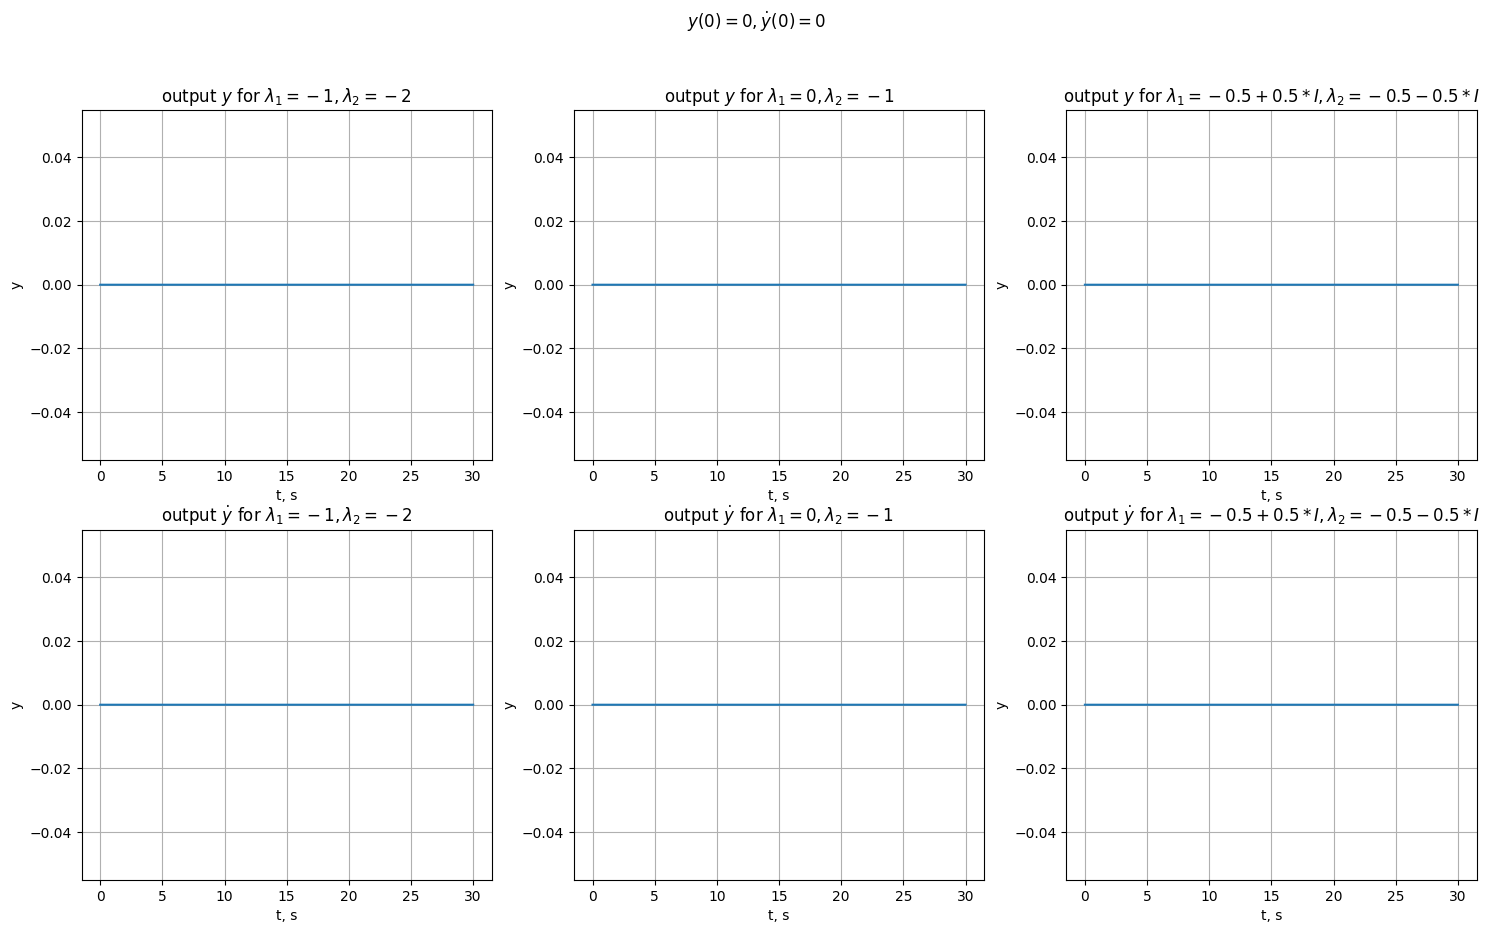

In [57]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 10)
)

fig.suptitle("$y(0) = 0, \dot y (0) = 0$")

for i in range(len(y1_0)):
    ax[0,i].plot(time, y1_0[i].states[0,:], label="output")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, s")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"output $y$ for $\lambda_1={lambdas[i][0]}, \lambda_2={lambdas[i][1]}$")
    
    ax[1,i].plot(time, y1_0[i].states[1,:], label="output")
    ax[1,i].set_ylabel("y")
    ax[1,i].set_xlabel("t, s")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"output $\dot y$ for $\lambda_1={lambdas[i][0]}, \lambda_2={lambdas[i][1]}$")

In [58]:
init_state2 = [0,1]

In [59]:
y1_1 = [
    ct.forced_response(
        rs,
        U=u1,
        X0=init_state2,
        T=time
    ) for rs in rss
]

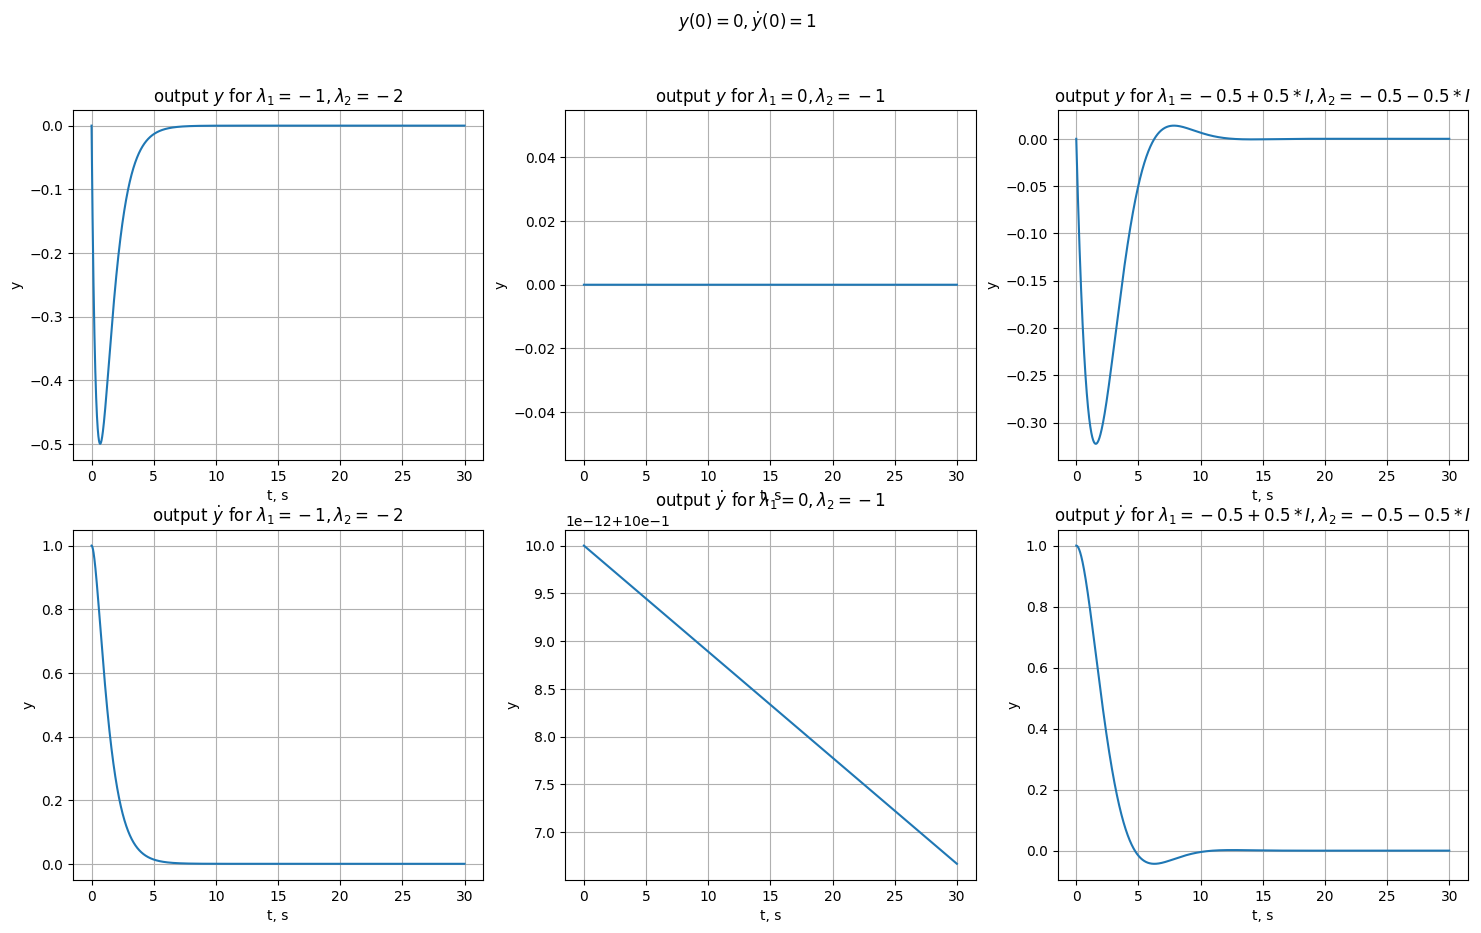

In [60]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 10)
)

fig.suptitle(f"$y(0) = {init_state2[0]}, \dot y (0) = {init_state2[1]}$")

for i in range(len(y1_0)):
    ax[0,i].plot(time, y1_1[i].states[0,:], label="output")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, s")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"output $y$ for $\lambda_1={lambdas[i][0]}, \lambda_2={lambdas[i][1]}$")
    
    ax[1,i].plot(time, y1_1[i].states[1,:], label="output")
    ax[1,i].set_ylabel("y")
    ax[1,i].set_xlabel("t, s")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"output $\dot y$ for $\lambda_1={lambdas[i][0]}, \lambda_2={lambdas[i][1]}$")

# Задание 2

In [61]:
T1_n = 1
T2_n = -0.5

промоделируем функцию

In [62]:
K, T1, T2, s = sympy.symbols("K T1 T2 s")

In [63]:
tf_sim = K * (1 / (T1*s + 1) ) * ( 1 / (T2*s + 1) ) * (1 / s)

In [64]:
tf = tf_sim / (1 + tf_sim)
tf = tf.simplify()
tf

K/(K + s*(T1*s + 1)*(T2*s + 1))

In [65]:
sympy.fraction(tf)[1].expand()

K + T1*T2*s**3 + T1*s**2 + T2*s**2 + s

fix t2

In [66]:
tf_t2f = tf.subs(T2, T2_n)

In [67]:
tf_t2f

K/(K + s*(1 - 0.5*s)*(T1*s + 1))

In [68]:
sympy.fraction(tf_t2f)[1].expand()

K - 0.5*T1*s**3 + T1*s**2 - 0.5*s**2 + s

In [69]:
sec = 10
t1_t = np.linspace(1e-5, sec, int(sec/dt))
k1 = 2 - 1/t1_t

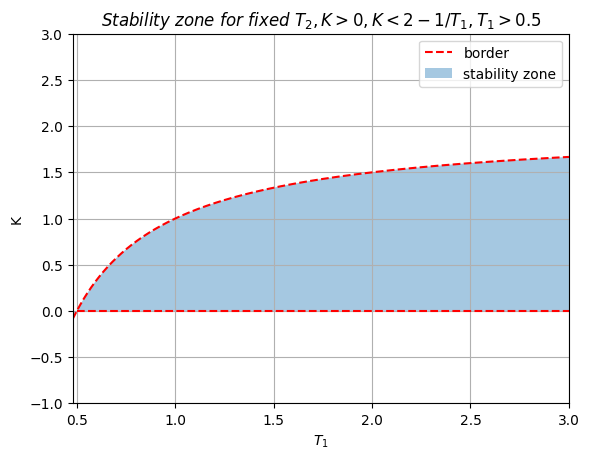

In [70]:
plt.plot(t1_t, k1, "r--", label="border")
plt.hlines(y=0, xmin=0.5, xmax=30, color="r", linestyle="dashed")
plt.fill_between(x=t1_t, y1=k1, alpha=0.4, label="stability zone")

plt.xlim(0.48, 3)
plt.ylim(-1, 3)

plt.xlabel('$T_1$')
plt.ylabel('K')

plt.title("$Stability \ zone \ for \ fixed \ T_2, K>0, K<2 - 1/T_1, T_1 > 0.5$")
plt.legend()
plt.grid()

fix t1

In [71]:
tf_t1f = tf.subs(T1, T1_n)

In [72]:
tf_t1f

K/(K + s*(s + 1)*(T2*s + 1))

In [73]:
sympy.fraction(tf_t1f)[1].expand()

K + T2*s**3 + T2*s**2 + s**2 + s

In [74]:
sec = 10
t2_t = np.linspace(1e-5, sec, int(sec/dt))
k2 = 1/t2_t + 1

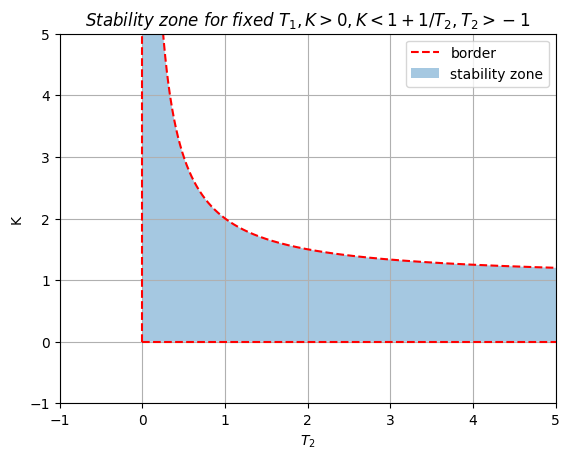

In [75]:
plt.plot(t2_t, k2, "r--", label="border")
plt.hlines(y=0, xmin=0, xmax=30, color="r", linestyle="dashed")
plt.vlines(x=0, ymin=0, ymax=30, color="r", linestyle="dashed")


plt.fill_between(x=t2_t, y1=0, y2=k2, alpha=0.4, label="stability zone")

plt.xlim(-1, 5)
plt.ylim(-1, 5)

plt.xlabel('$T_2$')
plt.ylabel('K')

plt.title("$Stability \ zone \ for \ fixed \ T_1, K>0, K < 1+ 1/T_2 , T_2 > -1$")
plt.legend()
plt.grid()

let  K = 1/4, T_1 = 0.6, T_2 = 1  for  stable

In [76]:
Ks = [0.2, 1, 2]
T1_m = 1.0
T2_m = 1.0

In [77]:
tfs = []
for k in Ks:
    tfs.append(
        ct.tf(k, [T1_m*T2_m, T1_m + T2_m, 1, k] )
    )

In [78]:
sec = 30
time = np.linspace(0, sec, int(sec/dt))
u_2 = np.ones_like(time)
init_state3 = 0

In [79]:
response = [
    ct.forced_response(
        t,
        T=time,
        U=u_2,
        X0=init_state3
    ) for t in tfs
]

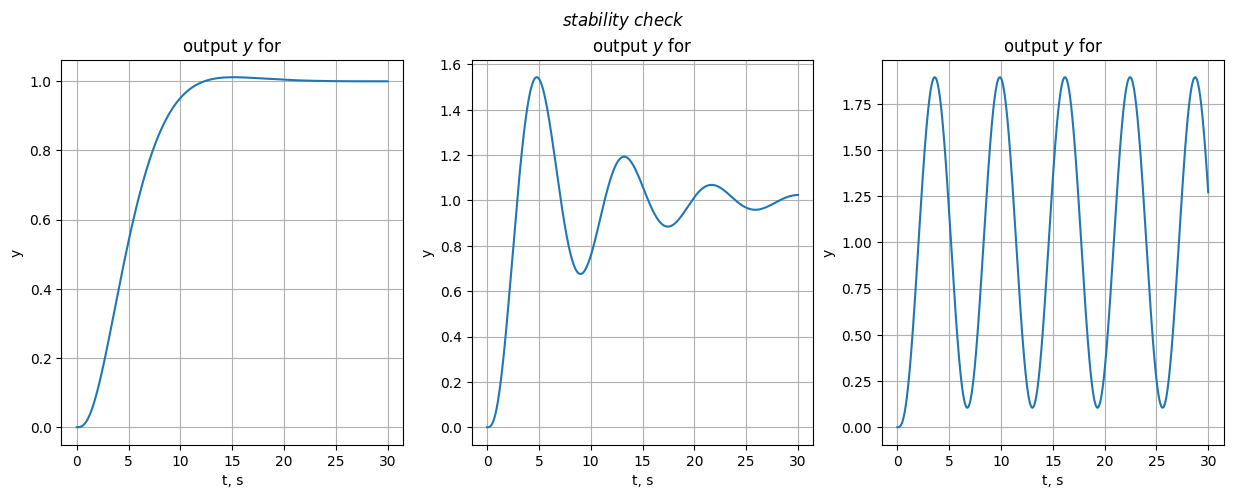

In [80]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15, 5)
)

fig.suptitle("$stability \ check$")

for i in range(len(response)):
    ax[i].plot(time, response[i].outputs, label="output")
    ax[i].set_ylabel("y")
    ax[i].set_xlabel("t, s")
    ax[i].grid(True)
    ax[i].set_title(f"output $y$ for ")

# Задание 3

Желаемый выход $y(t) = cos 6t + e ^{-2t}cos3t$

In [81]:
A = [
    [0, 6, 0, 0],
    [-6, 0, 0, 0],
    [0, 0, -2, 3],
    [0, 0, -3, -2]
]

B = [
    [0],
    [0],
    [0],
    [0]
]

X0 = [
    [1],
    [0],
    [0],
    [1]
]
C = [[1, 0, 0, 1]]

In [82]:
ss3 = ct.ss(A,B,C,0)

In [83]:
ss3.poles()

array([ 0.+6.j,  0.-6.j, -2.+3.j, -2.-3.j])

In [84]:
sec = 5
time = np.linspace(0, sec, int(sec/dt))
u = np.zeros_like(time)

In [85]:
y = np.cos(6*time) + np.exp(-2*time)*np.cos(3*time)

In [86]:
y_ss = ct.forced_response(
    ss3,
    T=time,
    U=u,
    X0=X0
)

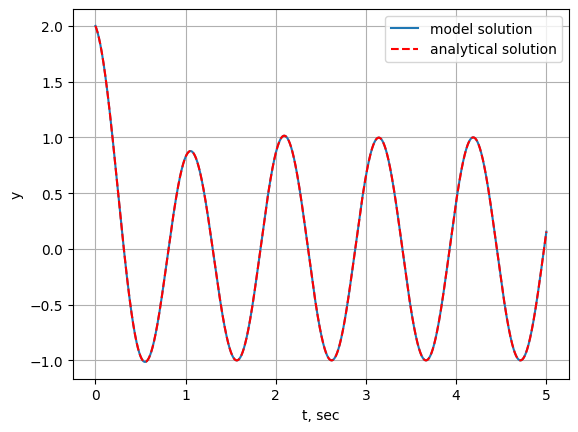

In [87]:
plt.plot(time, y_ss.outputs, label="model solution")
plt.plot(time, y, "r--", label="analytical solution")

plt.xlabel("t, sec")
plt.ylabel("y")

plt.legend()
plt.grid(True)

# Задание 4

In [88]:
tf = ct.ss2tf(ss[-1])
ss4 = rss[-1]

In [89]:
tf

TransferFunction(array([1.]), array([1. , 1. , 0.5]))

In [90]:
ss4

StateSpace(array([[-1. , -0.5],
       [ 1. ,  0. ]]), array([[1.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

In [91]:
states = [
    [0, 1],
    [1, 0],
    [1, 1]
]

In [92]:
sec = 10
time = np.linspace(0, sec, int(sec/dt))
u4 = np.zeros_like(time)

In [93]:
y4 = [
    ct.forced_response(
        ss4,
        T=time,
        U=u4,
        X0=state
    ) for state in states
]

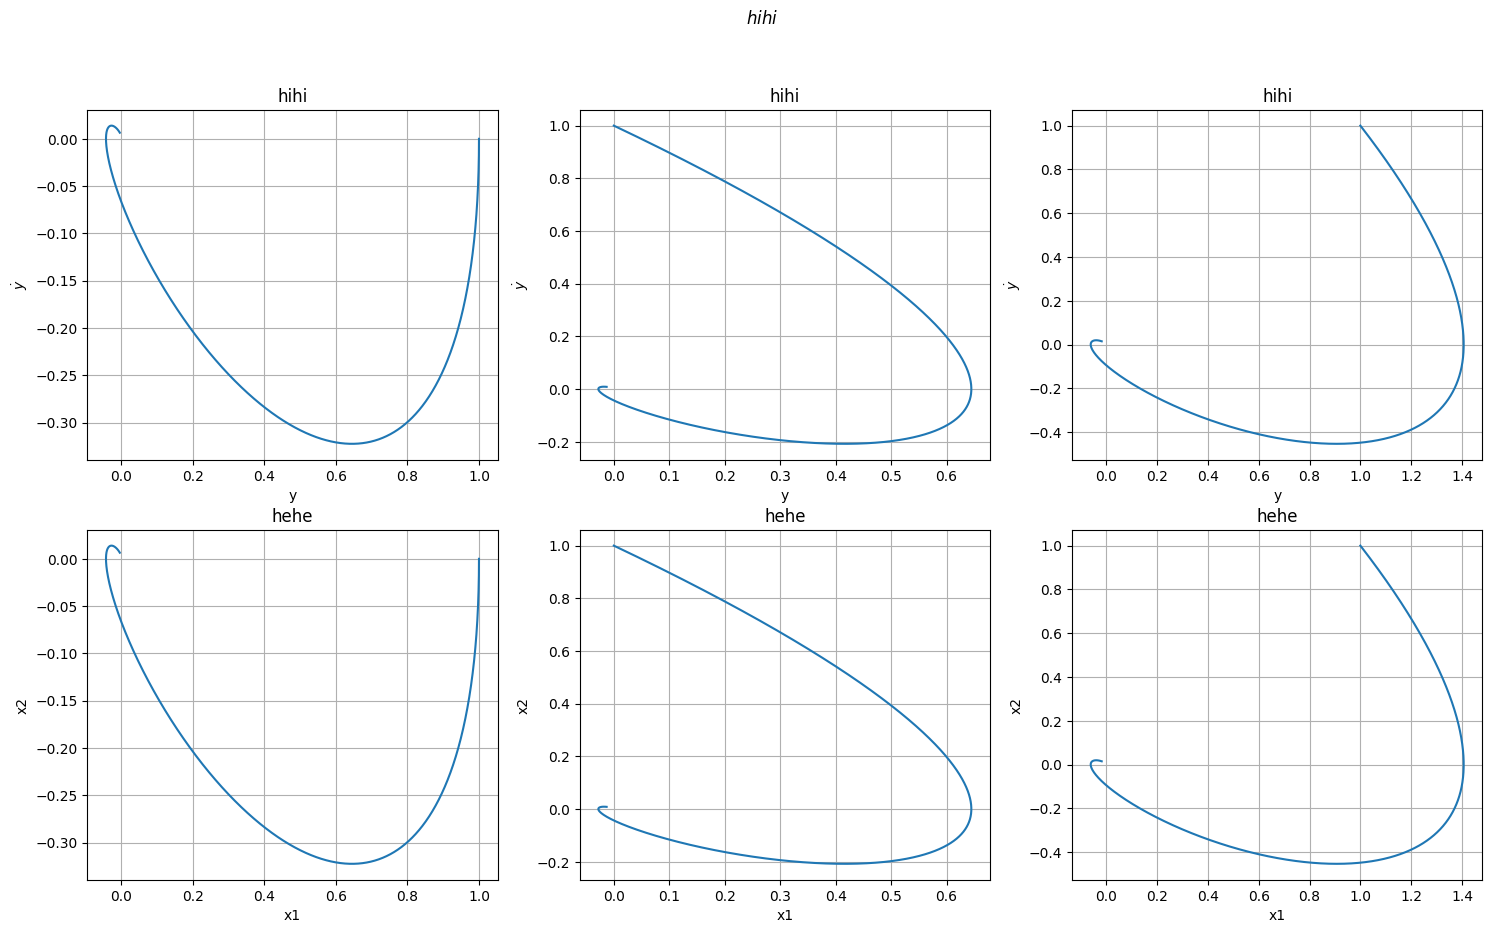

In [94]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 10)
)

fig.suptitle(f"$hihi$")

for i in range(len(y4)):
    ax[0,i].plot(y4[i].outputs, y4[i].states[0,:], label="output")
    ax[0,i].set_ylabel("$\dot y$")
    ax[0,i].set_xlabel("y")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"hihi")
    
    ax[1,i].plot(y4[i].states[1,:], y4[i].states[0,:], label="output")
    ax[1,i].set_ylabel("x2")
    ax[1,i].set_xlabel("x1")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"hehe")